<a href="https://colab.research.google.com/github/radwahashiesh/DeepLearningBreastCancer/blob/main/mlpMask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import numpy as np 
import pandas as pd
import os
from tensorflow import keras
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from tensorflow.keras.preprocessing.image import load_img ,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras import backend as K
# Common imports
import numpy as np
import os
import timeit
from sklearn.neural_network import MLPClassifier
 

In [320]:
import warnings
warnings.filterwarnings("ignore")

In [321]:
path = "/content/drive/MyDrive/Dataset_BUSI_with_GT (2)"
dir_list = [os.path.join(path,i) for i in os.listdir(path)]
size_dict = {}
for i,value in enumerate(dir_list):
    size_dict[os.listdir(path)[i]] = len(os.listdir(value))
size_dict 

{'benign': 891, 'malignant': 421, 'normal': 266}

In [322]:
import re
def clean(name):
    name = re.sub('[benign ().p]','',str(name))
    return name

In [323]:
df = pd.DataFrame(os.listdir(dir_list[0]))
# df = df.apply(str,axis=1)
df = df[0].apply(clean)
# print(df.info())
df = df[~df.str.contains('mask',regex =False)]
df = df.apply(str)
df_list = list(df)
type(df_list)
df_list.sort()
print(len(df_list))

210


In [324]:
img_size = 128
img_channel = 3
X_b , Xm_b , y_b = np.zeros((437,img_size,img_size,img_channel)) , np.zeros((437,img_size,img_size,img_channel)) , np.full(437,1) 
X_n , Xm_n , y_n = np.zeros((133,img_size,img_size,img_channel)) , np.zeros((133,img_size,img_size,img_channel)) , np.full(133,0) 
X_m , Xm_m , y_m = np.zeros((210,img_size,img_size,img_channel)) , np.zeros((210,img_size,img_size,img_channel)) , np.full(210,2)

In [325]:
img1_path = os.path.join(os.path.join(path,'benign'),os.listdir(os.path.join(path,'benign'))[1])

pil_img = load_img(img1_path,color_mode = 'rgb',target_size=(img_size,img_size))
img = img_to_array(pil_img)
img_shape = img.shape
print(img_shape)

def img_num(filename):
    
    val = 0
    
    for i in range(len(filename)) :
        if filename[i] == '(' :
            while True :
                i += 1
                if filename[i] == ')' :
                    break
                val = (val*10) + int(filename[i])
            break
    
    return val

for tumor_path in dir_list :
    for image in os.listdir(tumor_path) :
        p = os.path.join(tumor_path, image)
        pil_img = load_img(p,color_mode = 'rgb',target_size=(img_size,img_size))         # read image as  grayscale ans resize it
        
        if image[-5] == ')' :                                   #if real image 
            
            if image[0] == 'b' :
                X_b[img_num(image)-1]+= img_to_array(pil_img)  # If image is real add it
            if image[0] == 'n' :                               # to X as benign , normal
                X_n[img_num(image)-1]+= img_to_array(pil_img)  # or malignant.
            if image[0] == 'm' :
                X_m[img_num(image)-1]+= img_to_array(pil_img)
        else :                                                 #else masked image
            
            if image[0] == 'b' :
                Xm_b[img_num(image)-1]+= img_to_array(pil_img)  # Similarly add the target
            if image[0] == 'n' :                               # mask to y.
                Xm_n[img_num(image)-1]+= img_to_array(pil_img)
            if image[0] == 'm' :
                Xm_m[img_num(image)-1]+= img_to_array(pil_img)

(128, 128, 3)


In [326]:
X = np.concatenate((X_b, X_n, X_m), axis = 0)
Xm = np.concatenate((Xm_b, Xm_n, Xm_m), axis = 0)
y = np.concatenate((y_b, y_n, y_m), axis = 0)
X /= 255.0
Xm /= 255.0

print(X.shape)
print(Xm.shape)
print(y.shape)


(780, 128, 128, 3)
(780, 128, 128, 3)
(780,)


In [327]:
masks=[]
for i  in (Xm):
   img1 =  np.expand_dims(i, axis=-1)
   masks.append(img1)

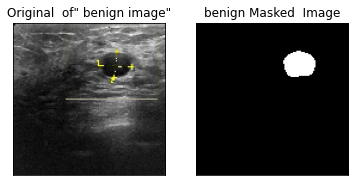

In [328]:
plt.subplot(121),plt.imshow(X[5],cmap = 'gray')

plt.title('Original  of" benign image"'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Xm[5],cmap = 'gray')
plt.title('benign Masked  Image'), plt.xticks([]), plt.yticks([])

plt.show()

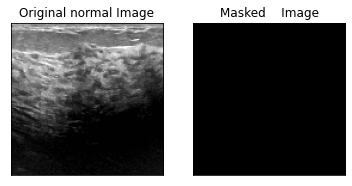

In [329]:
plt.subplot(121),plt.imshow(X[500],cmap = 'gray')
plt.title('Original normal Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Xm[500],cmap = 'gray')
plt.title('Masked    Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [330]:
from sklearn.model_selection import train_test_split
image=[]
for i in Xm:
  image.append(i.flatten())

X_train, X_test, y_train, y_test= train_test_split(image,y, test_size=.2, stratify=y, random_state=42)

initializing CNN & add a convolutional layer 

In [331]:
start = timeit.default_timer()

In [332]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100,solver='sgd',verbose='true',hidden_layer_sizes=(50,100,50),)
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.16534785
Iteration 2, loss = 1.06014672
Iteration 3, loss = 0.98692598
Iteration 4, loss = 0.91425470
Iteration 5, loss = 0.86266033
Iteration 6, loss = 0.81693917
Iteration 7, loss = 0.78285631
Iteration 8, loss = 0.75642939
Iteration 9, loss = 0.73695910
Iteration 10, loss = 0.71223713
Iteration 11, loss = 0.69247641
Iteration 12, loss = 0.68776988
Iteration 13, loss = 0.66911217
Iteration 14, loss = 0.65467535
Iteration 15, loss = 0.63875993
Iteration 16, loss = 0.62125924
Iteration 17, loss = 0.61517894
Iteration 18, loss = 0.59948466
Iteration 19, loss = 0.58715711
Iteration 20, loss = 0.58684740
Iteration 21, loss = 0.57073102
Iteration 22, loss = 0.56036952
Iteration 23, loss = 0.55352185
Iteration 24, loss = 0.54208309
Iteration 25, loss = 0.53661196
Iteration 26, loss = 0.52237847
Iteration 27, loss = 0.51414638
Iteration 28, loss = 0.51407219
Iteration 29, loss = 0.50029964
Iteration 30, loss = 0.50027226
Iteration 31, loss = 0.48324713
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 100, 50), max_iter=100, solver='sgd',
              verbose='true')

In [333]:
end = timeit.default_timer()

In [334]:
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

Classifier accuracy on the training set is 0.9967948717948718 
Classifier accuracy on the test set is 0.8012820512820513 


Plotting loss graph

In [335]:

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix of testing: \n{0}'.format(conf_mx))
print('classification_report is')
print(classification_report(y_test, y_pred_test))
print('time to mlp model in seconds is : \n{0}'.format(end-start))

Confusion matrix of testing: 
[[27  0  0]
 [ 0 75 12]
 [ 0 19 23]]
classification_report is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.80      0.86      0.83        87
           2       0.66      0.55      0.60        42

    accuracy                           0.80       156
   macro avg       0.82      0.80      0.81       156
weighted avg       0.79      0.80      0.80       156

time to mlp model in seconds is : 
60.31145510599981
